

## Homework 4: Logistic regression, hyperparameter optimization 




## Imports 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

<br><br><br><br>

## Exercise 1: Implementing `DummyClassifier` 
<hr>
rubric={points:25}

In this course (unlike CPSC 340) you will generally **not** be asked to implement machine learning algorihtms (like logistic regression) from scratch. However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.

As a reminder, `DummyClassifier` is meant as a baseline and is generally the worst possible "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get your started, I have given you a `return` statement in each case that returns the correct data type: `fit` can return nothing, `predict` returns an array whose size is the number of examples, `predict_proba` returns an array whose size is the number of examples x 2, and `score` returns a number.

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the frequency of each class in the training data, which is the behaviour of `DummyClassifier(strategy='prior')`. Your `score` function should call your `predict` function. Again, you can compare with `DummyClassifier` using the code below.

To simplify this question, you can assume **binary classification**, and furthermore that these classes are **encoded as 0 and 1**. In other words, you can assume that `y` contains only 0s and 1s. The real `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "mouse", etc.

In [8]:
import numpy as np
import pandas as pd
y = pd.Series([1, 0, 1, 1 , 1, 0])
y.value_counts(normalize=True).values

array([0.66666667, 0.33333333])

In [9]:
class MyDummyClassifier:
    """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0s and 1s.
    """
    value_attr = None
    value_prob = None
    import pandas as pd
    def fit(self, X, y):
        y = pd.Series(y)
        value = y.value_counts().index[0]
        MyDummyClassifier.value_attr = value
        MyDummyClassifier.value_prob = y.value_counts(normalize=True).values
        return None  # Replace with your code

    def predict(self, X):
        
        return np.full(X.shape[0], self.value_attr)  # Replace with your code

    def predict_proba(self, X):
        
        return np.full((X.shape[0], 2), self.value_prob[::-1])  # Replace with your code

    def score(self, X, y):
        y = pd.Series(y)
        self.value_prob = y.value_counts(normalize=True).values
        return self.value_prob[0]  # Replace with your code

Below are some tests for `predict` using randomly generated data. You may want to run the cell a few times to make sure you explore the different cases (or automate this with a loop or random seeds).

In [10]:
# For testing, generate random data
n_train = 101
n_valid = 21
d = 5
X_train_dummy = np.random.randn(n_train, d)
X_valid_dummy = np.random.randn(n_valid, d)
y_train_dummy = np.random.randint(2, size=n_train)
y_valid_dummy = np.random.randint(2, size=n_valid)

my_dc = MyDummyClassifier()
sk_dc = DummyClassifier(strategy="prior")

my_dc.fit(X_train_dummy, y_train_dummy)
sk_dc.fit(X_train_dummy, y_train_dummy)

assert np.array_equal(my_dc.predict(X_train_dummy), sk_dc.predict(X_train_dummy))
assert np.array_equal(my_dc.predict(X_valid_dummy), sk_dc.predict(X_valid_dummy))

Below are some tests for `predict_proba`.

In [11]:
assert np.allclose(
    my_dc.predict_proba(X_train_dummy), sk_dc.predict_proba(X_train_dummy)
)
assert np.allclose(
    my_dc.predict_proba(X_valid_dummy), sk_dc.predict_proba(X_valid_dummy)
)

AssertionError: 

In [12]:
sk_dc.predict_proba(X_train_dummy)

array([[0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.53465347, 0.46534653],
       [0.

In [13]:
my_dc.predict_proba(X_train_dummy)

array([[0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.46534653, 0.53465347],
       [0.

Below are some tests for `score`.

In [14]:
assert np.isclose(
    my_dc.score(X_train_dummy, y_train_dummy), sk_dc.score(X_train_dummy, y_train_dummy)
)
assert np.isclose(
    my_dc.score(X_valid_dummy, y_valid_dummy), sk_dc.score(X_valid_dummy, y_valid_dummy)
)

In [15]:
my_dc.score(X_valid_dummy, y_valid_dummy)

0.5714285714285714

In [16]:
sk_dc.score(X_valid_dummy, y_valid_dummy)

0.5714285714285714

<br><br><br><br>

## Exercise 2: Trump Tweets
<hr>

For the rest of this assignment we'll be looking at a [dataset of Donald Trump's tweets](https://www.kaggle.com/austinreese/trump-tweets) as of June 2020. You should start by downloading the dataset. Unzip it and move the file `realdonaldtrump.csv` into this directory. As usual, please do not submit the dataset when you submit the assignment. 

In [17]:
tweets_df = pd.read_csv("realdonaldtrump.csv", index_col=0)
tweets_df.head()

,link,content,date,retweets,favorites,mentions,hashtags
id,,,,,,,
1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [18]:
tweets_df.shape

(43352, 7)

We will be trying to predict whether a tweet will go "viral", defined as having more than 10,000 retweets:

In [19]:
y = tweets_df["retweets"] > 10_000
y

id
1698308935             False
1701461182             False
1737479987             False
1741160716             False
1773561338             False
                       ...  
1273405198698975232     True
1273408026968457216     True
1273442195161387008    False
1273442469066276864    False
1273442528411385858    False
Name: retweets, Length: 43352, dtype: bool

To make predictions, we'll be using only the content (text) of the tweet. 

In [20]:
X = tweets_df["content"]
X

id
1698308935             Be sure to tune in and watch Donald Trump on L...
1701461182             Donald Trump will be appearing on The View tom...
1737479987             Donald Trump reads Top Ten Financial Tips on L...
1741160716             New Blog Post: Celebrity Apprentice Finale and...
1773561338             "My persona will never be that of a wallflower...
                                             ...                        
1273405198698975232    Joe Biden was a TOTAL FAILURE in Government. H...
1273408026968457216    Will be interviewed on @ seanhannity tonight a...
1273442195161387008                           pic.twitter.com/3lm1spbU8X
1273442469066276864                           pic.twitter.com/vpCE5MadUz
1273442528411385858                           pic.twitter.com/VLlc0BHW41
Name: content, Length: 43352, dtype: object

For the purpose of this assignment, you can ignore all the other columns in the original dataset.

#### 2(a) ordering the steps
rubric={points:8}

Let's start by building a model using `CountVectorizer` and `LogisticRegression`. The code required to do this has been provided below, but in the wrong order. 

- Rearrange the lines of code to correctly fit the model and compute the cross-validation score. 
- Add a short comment to each block to describe what the code is doing.

In [21]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)

# make the instance of Log. Reg.
lr = LogisticRegression(max_iter=1000)

# remove all stopwords from vocabulary
countvec = CountVectorizer(stop_words="english")

# make pipeline usine LR estimator 
pipe = make_pipeline(countvec, lr)

# make dataframe cross validation scores 
cross_val_results = pd.DataFrame(
    cross_validate(pipe, X_train, y_train, return_train_score=True)
)

# take mean of all cross validation results
cross_val_results.mean()

fit_time       2.958198
score_time     0.254919
test_score     0.897890
train_score    0.967045
dtype: float64

<br><br>

#### 2(b) Cross-validation fold sub-scores
rubric={points:5}

Above we averaged the scores from the 5 folds of cross-validation. 

- Print out the 5 individual scores. Reminder: `sklearn` calls them `"test_score"` but they are really (cross-)validation scores. 
- Are the 5 scores close to each other or spread far apart? (This is a bit subjective, answer to the best of your ability.)
- How does the size of this dataset (number of rows) compare to the cities dataset we have been using in class? How does this relate to the different sub-scores from the 5 folds?

In [22]:
scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,2.844917,0.250168,0.899123,0.966014
1,2.873375,0.268516,0.899739,0.968859
2,2.806514,0.249892,0.896356,0.965976
3,2.810435,0.209787,0.898201,0.968552
4,2.708075,0.231835,0.896032,0.965823


`All the test scores are close to each other`

<br><br>

#### 2(c) baseline
rubric={points:3}

By the way, are these scores any good? 

- Run `DummyClassifier` (or `MyDummyClassifier`!) on this dataset.
- Compare the `DummyClassifier` score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
- Is it necessary to use `CountVectorizer` here? Briefly explain.

In [23]:
sk_dc = DummyClassifier(strategy="prior")
sk_dc.fit(X_train, y_train)
scores = cross_validate(sk_dc, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.000000,0.008178,0.738582,0.738534
1,0.005350,0.000000,0.738582,0.738534
2,0.008442,0.000000,0.738582,0.738534
3,0.003047,0.000000,0.738428,0.738572
4,0.000000,0.000000,0.738542,0.738544


`Here Logistic Regression gives more accurate score on testing so than dummy Classifier we will use logistic Regression`

`It is necesssary to use CountVectorizer in this text data so after we do some text processing to derive meaning of the sentence`

<br><br>

#### 2(d) probability scores
rubric={points:5}

Here we train a logistic regression classifier on the entire training set: 

(Note: this is relying on the `pipe` variable from 2(a) - you'll need to redefine it if you overwrote that variable in between.)

In [24]:
pipe.fit(X_train, y_train);

Using this model, find the tweet in the **test set** with the highest predicted probability of being viral. Print out the tweet and the associated probability score.

Reminder: you are free to reuse/adapt code from lecture. Please add in a small attribution, e.g. "From Lecture 7".

In [25]:
df = pd.DataFrame(pipe.predict_proba(X_test),index = X_test.index)

In [26]:
df.index

Int64Index([1039608725819088899, 1009071326219395073, 1180245134363025415,
             570406679151579136,  960530665702912000,  305869921177464834,
             652165099738656768,  573470801304772608,  355971872334159873,
             309621656127680512,
            ...
            1131215957601476608, 1196832113447845889,  747029963702996992,
             692553019150503937, 1196256729471827968,  640279939061841920,
             303868650996240384,  425110830200659969,  462921249103306752,
            1031150465759633408],
           dtype='int64', name='id', length=10838)

In [27]:
df.iloc[np.argmax(df[1])]

0    6.747390e-08
1    9.999999e-01
Name: 1193603788898263041, dtype: float64

In [28]:
X_test.loc[1193603788898263041]

'Corrupt politician Adam Schiff wants people from the White House to testify in his and Pelosi’s disgraceful Witch Hunt, yet he will not allow a White House lawyer, nor will he allow ANY of our requested witnesses. This is a first in due process and Congressional history!'

<br><br>

#### 2(e) coefficients
rubric={points:4}

We can extract the `CountVectorizer` and `LogisticRegression` objects from the `make_pipeline` object as follows:


In [29]:
vec_from_pipe = pipe.named_steps["countvectorizer"]
lr_from_pipe = pipe.named_steps["logisticregression"]

Using these extracted components above, display the 5 words with the highest coefficients and the 5 words with the smallest coefficients.

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [31]:
coef = pipe['logisticregression'].coef_

In [32]:
df = pd.DataFrame(coef.T)

In [33]:
df.sort_values([0]).head()

,0
30315,-3.116975
37055,-2.637186
6928,-2.565332
37051,-2.316065
2219,-2.294995


In [34]:
df.sort_values([0]).tail()

,0
36825,2.380495
10915,2.434337
14919,2.692805
24999,2.712467
17729,2.731873


<br><br>

#### 2(f)
rubric={points:10}

scikit-learn provides a lot of useful tools like `make_pipeline` and `cross_validate`, which are awesome. But with these fancy tools it's also easy to lose track of what is actually happening under the hood. Here, your task is to "manually" (without `Pipeline` and without `cross_validate` or `cross_val_score`) compute logistic regression's validation score on one fold (that is, train on 80% and validate on 20%) of the training data. 

You should start with the following `CountVectorizer` and `LogisticRegression` objects, as well as `X_train` and `y_train` (which you should further split):

In [35]:
countvec = CountVectorizer(stop_words="english")
lr = LogisticRegression(max_iter=1000)

In [36]:
X = tweets_df["content"]
X

id
1698308935             Be sure to tune in and watch Donald Trump on L...
1701461182             Donald Trump will be appearing on The View tom...
1737479987             Donald Trump reads Top Ten Financial Tips on L...
1741160716             New Blog Post: Celebrity Apprentice Finale and...
1773561338             "My persona will never be that of a wallflower...
                                             ...                        
1273405198698975232    Joe Biden was a TOTAL FAILURE in Government. H...
1273408026968457216    Will be interviewed on @ seanhannity tonight a...
1273442195161387008                           pic.twitter.com/3lm1spbU8X
1273442469066276864                           pic.twitter.com/vpCE5MadUz
1273442528411385858                           pic.twitter.com/VLlc0BHW41
Name: content, Length: 43352, dtype: object

In [37]:
X_transformed = countvec.fit_transform(X)
print(X_transformed)

  (0, 42280)	1
  (0, 45038)	1
  (0, 47074)	1
  (0, 15978)	1
  (0, 44655)	1
  (0, 27302)	1
  (0, 32160)	1
  (0, 14479)	1
  (0, 27670)	1
  (0, 35288)	1
  (0, 27984)	1
  (0, 44144)	1
  (1, 15978)	1
  (1, 44655)	1
  (1, 7640)	1
  (1, 46455)	1
  (1, 44125)	1
  (1, 30885)	1
  (1, 15588)	1
  (1, 11665)	1
  (1, 7688)	1
  (1, 31909)	1
  (1, 10079)	1
  (1, 43620)	1
  (1, 27846)	1
  :	:
  (43346, 5668)	1
  (43347, 44231)	1
  (43347, 18166)	1
  (43347, 20692)	1
  (43347, 25247)	1
  (43347, 9405)	1
  (43347, 44244)	1
  (43347, 10789)	1
  (43348, 44144)	1
  (43348, 17280)	1
  (43348, 23790)	1
  (43348, 39471)	1
  (43348, 0)	1
  (43349, 12824)	1
  (43349, 45175)	1
  (43349, 34568)	1
  (43349, 3971)	1
  (43350, 12824)	1
  (43350, 45175)	1
  (43350, 34568)	1
  (43350, 46754)	1
  (43351, 12824)	1
  (43351, 45175)	1
  (43351, 34568)	1
  (43351, 46620)	1


In [38]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_transformed,y, train_size = 0.8, test_size = 0.2, random_state = 15)

In [39]:
lr.fit(X_train1,y_train1)

LogisticRegression(max_iter=1000)

In [40]:
y_pred1 = lr.predict(X_test1)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.9026640525890901

Meta-comment: you might be wondering why we're going into "implementation" here if this course is about _applied_ ML. In CPSC 340, we would go all the way down into `LogisticRegression` and understand how `fit` works, line by line. Here we're not going into that at all, but I still think this type of question (and Exercise 1) is a useful middle ground. I do want you to know what is going on in `Pipeline` and in `cross_validate` even if we don't cover the details of `fit`. To get into logistic regression's `fit` requires a bunch of math; here, we're keeping it more conceptual and avoiding all those prerequisites.

<br><br><br><br>

## Exercise 3: hyperparameter optimization
<hr>

#### 3(a)
rubric={points:4}

The following code varies the `max_features` hyperparameter of `CountVectorizer` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `max_features`. It also prints the results. Based on the plot/output, what value of `max_features` seems best? Briefly explain.

Note: the code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

10
100
1000
10000
100000


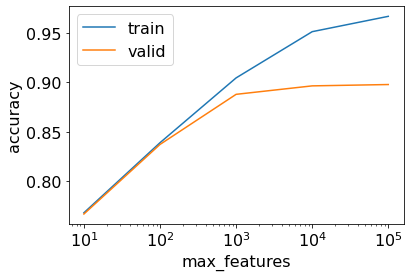

In [42]:
train_scores = []
cv_scores = []

max_features = [10, 100, 1000, 10000, 100000]

for mf in max_features:
    print(mf)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=mf),
        LogisticRegression(max_iter=1000),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(max_features, train_scores, label="train")
plt.semilogx(max_features, cv_scores, label="valid")
plt.legend()
plt.xlabel("max_features")
plt.ylabel("accuracy");

In [44]:
pd.DataFrame({"max_features": max_features, "train": train_scores, "cv": cv_scores})

,max_features,train,cv
0,10,0.767854,0.766593
1,100,0.838900,0.837147
2,1000,0.904618,0.887956
3,10000,0.951498,0.896537
4,100000,0.967045,0.897890


`10000 is best value of max_feature bcz after that there is no much differance in validation score`

<br><br>

#### 3(b)
rubric={points:4}

The following code varies the `C` hyperparameter of `LogisticRegression` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `C`. Based on the plot, what value of `C` seems best?

Note: the code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
31.622776601683793


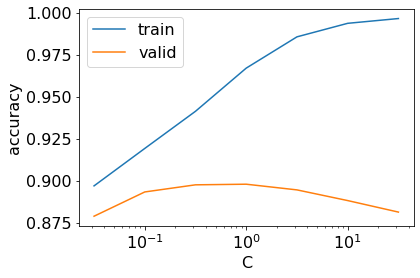

In [45]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-1.5, 2, 0.5)

for C in C_vals:
    print(C)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=None),
        LogisticRegression(max_iter=1000, C=C),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [46]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

,C,train,cv
0,0.031623,0.896898,0.878821
1,0.100000,0.919196,0.893277
2,0.316228,0.941333,0.897521
3,1.000000,0.967045,0.897890
4,3.162278,0.985675,0.894507
5,10.000000,0.993733,0.888140
6,31.622777,0.996578,0.881282


`C=1 value is best bcz after increasing c value validation accuracy is goes down.`

<br><br>

#### 3(c)
rubric={points:12}

- Using `GridSearchCV`, jointly optimize `max_features` and `C` across all the combinations of values we tried above. 
  - Note: the code might be a bit slow here. 
  - Setting `n_jobs=-1` should speed it up if you have a multi-core processor.
  - You can reduce the number of folds (e.g. `cv=2`) to speed it up if necessary.
- What are the best values of `max_features` and `C` according to your grid search?
- Do these best values agree with what you found in parts (a) and (b)?
- Generally speaking, _should_ these values agree with what you found in parts (a) and (b)? Explain.

In [47]:
list(10.0 ** np.arange(-1.5, 2, 0.5))

[0.03162277660168379,
 0.1,
 0.31622776601683794,
 1.0,
 3.1622776601683795,
 10.0,
 31.622776601683793]

In [48]:
pipe_logr = make_pipeline(
        CountVectorizer(stop_words="english"),
        LogisticRegression(max_iter=1000)
    )

param_grid = {
    "countvectorizer__max_features":[10, 100, 1000, 10_000, 100_000],
    "logisticregression__C": list(10.0 ** np.arange(-1.5, 2, 0.5)),
}


gridsearch = GridSearchCV(pipe_logr,param_grid,cv=2, n_jobs=-1, return_train_score=True)

In [49]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [10, 100, 1000, 10000,
                                                           100000],
                         'logisticregression__C': [0.03162277660168379, 0.1,
                                                   0.31622776601683794, 1.0,
                                                   3.1622776601683795, 10.0,
                                                   31.622776601683793]},
             return_train_score=True)

In [50]:
gridsearch.best_score_

0.8928154025958048

In [51]:
gridsearch.best_params_

{'countvectorizer__max_features': 100000,
 'logisticregression__C': 0.31622776601683794}

`no, both are different values`

<br><br>

#### 3(d)
rubric={points:5}

- Evaluate your final model on the test set. 
- How does your test accuracy compare to your validation accuracy? 
- If they are different: do you think this is because you "overfitted on the validation set", or simply random luck?

In [52]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression',
                 LogisticRegression(C=31.622776601683793, max_iter=1000))])

In [53]:
y_pred = pipe.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.8862336224395645

<br><br><br><br>

## Exercise 4: Very short answer questions
rubric={points:10}

Each question is worth 2 points. Max 2 sentences per answer.

1. What is the problem with calling `fit_transform` on your test data with `CountVectorizer`? 
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. If you could only access one of `predict` or `predict_proba`, which one would you choose? Briefly explain.
4. What are two advantages of using sklearn `Pipeline`s? 
5. What are two advantages of `RandomizedSearchCV` over `GridSearchCV`?

1.  Because a CountVectorizer expects an iterable as input and when you supply a dataframe as an argument, only thing thats iterated is the column names.`